# Program -16 : Demonstrate use of make_classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

   Feature 1  Feature 2  Target
0  -0.872929   0.013042       1
1   1.312935   2.770534       1
2   2.340428   2.420996       1
3   2.294548  -0.404380       1
4   0.944105   0.477241       1


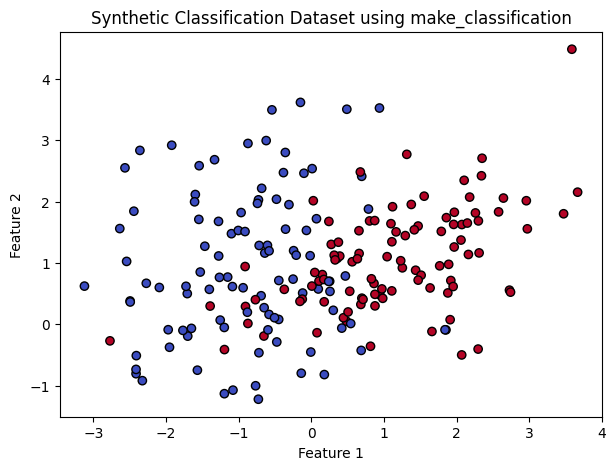

In [2]:
X, y = make_classification(
    n_samples=200,       # number of data points
    n_features=2,        # total number of features
    n_informative=2,     # number of useful features
    n_redundant=0,       # number of redundant features
    n_clusters_per_class=1,
    n_classes=2,         # binary classification
    random_state=42
)


df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
print(df.head())

# Plot the dataset
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Classification Dataset using make_classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
X, y = make_classification(
    n_samples=500,
    n_features=6,
    n_informative=4,
    n_redundant=2,
    n_classes=3,
    random_state=1
)
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (500, 6)
Target vector shape: (500,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
X, y = make_classification(
    n_samples=300,
    n_features=2,     
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

X_train ,X_test,y_train, y_test = train_test_split(X, y,test_size =0.3, random_state =42)
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Accuracy: 0.9555555555555556

Confusion Matrix:
 [[44  2]
 [ 2 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.95      0.95      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



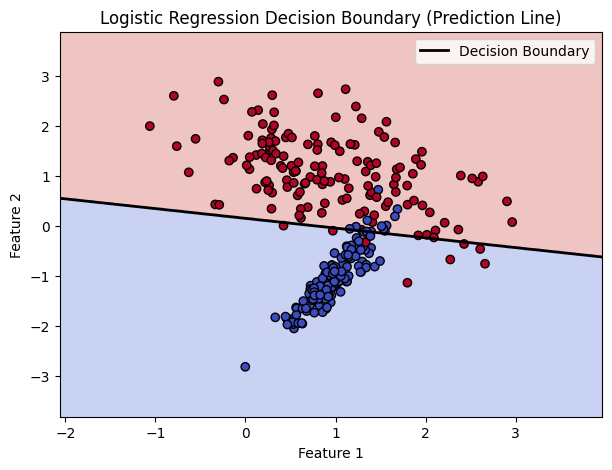

In [6]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate synthetic data
X, y = make_classification(
    n_samples=300,
    n_features=2,        # For 2D plotting
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Step 5: Predict probabilities for mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot everything
plt.figure(figsize=(7,5))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# Plot prediction (decision) line explicitly
# Formula: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
coef = model.coef_[0]
intercept = model.intercept_[0]
x_values = np.linspace(x_min, x_max, 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, color='black', linewidth=2, label='Decision Boundary')

plt.title("Logistic Regression Decision Boundary (Prediction Line)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
